In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = pd.read_csv("ClimateDataBasel.csv")

In [2]:
#assigning attributes to the dataset
column_names = ["tempMin","tempMax","tempMean","humidityMin","humidityMax","humidityMean",
                "pressureMin","pressureMax","pressureMean","preciTotal",
                "snowAmount","sunDuration","gustMin","gustMax","gustMean",
                "speedMin","speedMax","speedMean"]
data.columns = column_names
data.head()
data1=np.array(data)

<AxesSubplot:>

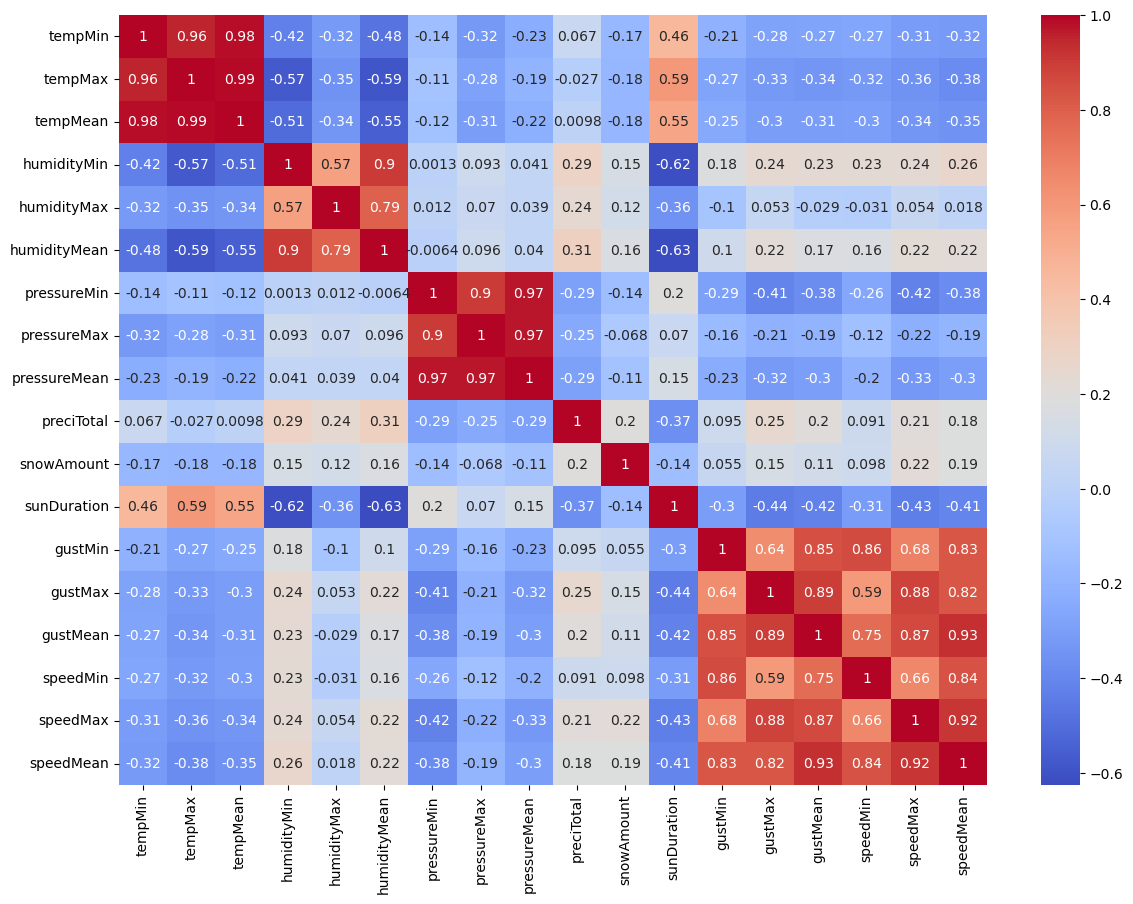

In [51]:
#feature selection using correlation matrix
# diplay corr in heat map
# import library

import seaborn as sns

corr = data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True,cmap='coolwarm')

In [29]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            #if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            if (corr_matrix.iloc[i, j]) > threshold:
                # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                
        
    return col_corr
   

In [30]:
#setting threshold as 0.90
corr_features = correlation(corr, 0.90)
len(set(corr_features))
corr_features

{'gustMax',
 'gustMean',
 'humidityMean',
 'pressureMax',
 'pressureMean',
 'speedMax',
 'speedMean',
 'speedMin',
 'tempMax',
 'tempMean'}

In [31]:
#features after dropping
data_corr = data.drop(corr_features,axis=1)
data_corr


,tempMin,humidityMin,humidityMax,pressureMin,preciTotal,snowAmount,sunDuration,gustMin
0,8.100529,61,96,1013.1,0.2,0.0,350.56274,3.240000
1,11.110529,59,94,1013.9,1.9,0.0,287.23404,6.479999
2,10.320529,71,96,1015.3,0.1,0.0,126.26506,3.240000
3,10.450529,54,92,1015.9,0.0,0.0,881.24710,2.160000
4,12.350529,47,88,1015.7,0.0,0.0,951.56665,0.720000
...,...,...,...,...,...,...,...,...
1758,6.160529,82,94,1025.6,5.0,0.0,0.00000,9.720000
1759,1.830529,53,95,1034.7,0.0,0.0,502.84442,3.600000
1760,-0.529471,40,83,1036.7,0.0,0.0,489.58572,5.760000
1761,0.440529,41,69,1032.2,0.0,0.0,513.05000,2.160000


In [32]:
#Standardize
scaler = preprocessing.StandardScaler().fit(data_corr)
X_scaled = scaler.transform(data_corr)
X_scaled

scaler = preprocessing.StandardScaler().fit(data_corr[['humidityMin']])
X_col_scaled = scaler.transform(data_corr[['humidityMin']])
X_col_scaled
scaler = preprocessing.StandardScaler().fit(data_corr[['tempMin']])
X_col_scaled1 = scaler.transform(data_corr[['tempMin']])
X_col_scaled1
scaler = preprocessing.StandardScaler().fit(data_corr[['tempMin','humidityMin']])
X_col_scaled2 = scaler.transform(data_corr[['tempMin','humidityMin']])
X_col_scaled2


array([[-0.08181097,  0.53355953],
       [ 0.30401292,  0.3790735 ],
       [ 0.20275017,  1.30598969],
       ...,
       [-1.18801039, -1.08854381],
       [-1.06367512, -1.01130079],
       [-0.74065978, -0.31611365]])

In [33]:
import pandas as pd
import numpy as np
my_np_1=X_col_scaled # Numpy array
# print(my_np) # display the array 
my_pd_1=pd.DataFrame(data=my_np_1,columns=['TEMP_MIN'])
display(my_pd_1)




import pandas as pd
import numpy as np
my_np_2=X_col_scaled1 # Numpy array
# print(my_np) # display the array 
my_pd_2=pd.DataFrame(data=my_np_2,columns=['HUM_MIN'])
display(my_pd_2)




my_pd_3 = my_pd_1
my_pd_4=my_pd_3.join(my_pd_2)
display(my_pd_4)

,TEMP_MIN
0,0.533560
1,0.379073
2,1.305990
3,-0.007142
4,-0.547843
...,...
1758,2.155663
1759,-0.084385
1760,-1.088544
1761,-1.011301


,HUM_MIN
0,-0.081811
1,0.304013
2,0.202750
3,0.219414
4,0.462957
...,...
1758,-0.330482
1759,-0.885504
1760,-1.188010
1761,-1.063675


,TEMP_MIN,HUM_MIN
0,0.533560,-0.081811
1,0.379073,0.304013
2,1.305990,0.202750
3,-0.007142,0.219414
4,-0.547843,0.462957
...,...,...
1758,2.155663,-0.330482
1759,-0.084385,-0.885504
1760,-1.088544,-1.188010
1761,-1.011301,-1.063675


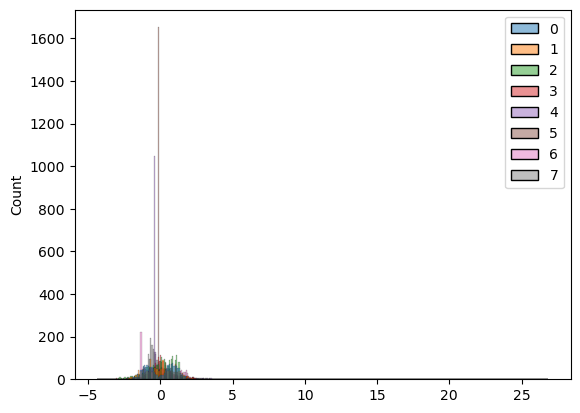

In [34]:
sns.histplot(X_scaled)
plt.show()

In [35]:
#global outlier detection using z score method
mean = np.mean(X_col_scaled)
std = np.std(X_col_scaled)
print('mean of the dataset is', mean)
print('std. deviation is', std)


threshold_min = -3
threshold_max = 3
outlier = []
outlier1 = []
for i in X_col_scaled:
    z = (i-mean)/std
    if z < threshold_min or z > threshold_max:
        outlier.append(i)
print('outlier in dataset is',outlier)

for i in X_col_scaled1:
    z = (i-mean)/std
    if z < threshold_min or z > threshold_max:
        outlier1.append(i)
print('outlier1 in dataset is',outlier1)



mean of the dataset is -1.128485343237822e-16
std. deviation is 1.0
outlier in dataset is [array([3.00533604])]
outlier1 in dataset is []


C:\Users\datkh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


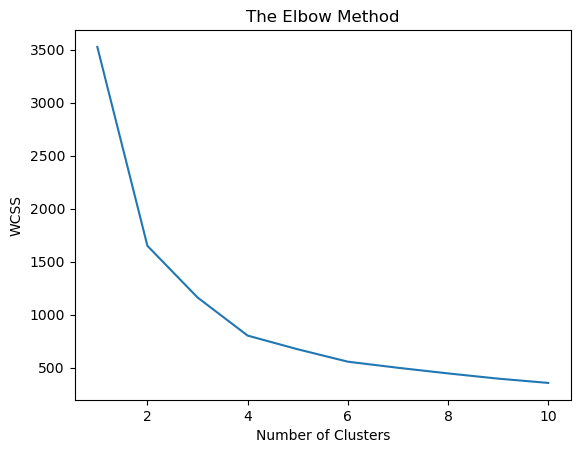

[3525.9999999999995,
 1649.0322312687501,
 1162.0933317854829,
 802.1808718715048,
 673.0275314040426,
 556.0431395293415,
 498.5137220553361,
 445.45101199593233,
 396.13202509262715,
 355.6327750238284]

In [36]:
# Clustering
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(my_pd_4)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#X
#y
wcss

In [52]:
#Clustering
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(my_pd_4)
#model = kmeans.fit(data[['tempMin','pressureMin']])
print("model\n", model)
model.inertia_
#labels=model.labels_
#labels

model
 KMeans(n_clusters=2)


1649.0317891219615

In [38]:
y_predicted = model.predict(my_pd_4)
y_predicted
my_pd_4['cluster'] = y_predicted
my_pd_4

,TEMP_MIN,HUM_MIN,cluster
0,0.533560,-0.081811,1
1,0.379073,0.304013,1
2,1.305990,0.202750,1
3,-0.007142,0.219414,0
4,-0.547843,0.462957,0
...,...,...,...
1758,2.155663,-0.330482,1
1759,-0.084385,-0.885504,1
1760,-1.088544,-1.188010,1
1761,-1.011301,-1.063675,1


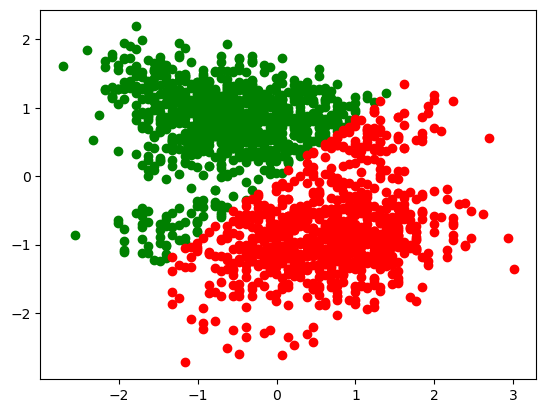

In [39]:
df1=my_pd_4[my_pd_4.cluster==0]
df2=my_pd_4[my_pd_4.cluster==1]
plt.scatter(df1.TEMP_MIN,df1['HUM_MIN'],color='green')
plt.scatter(df2.TEMP_MIN,df2['HUM_MIN'],color='red')


In [44]:
#Agglomerative clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(my_pd_4)

    silhouette_avg = silhouette_score(my_pd_4, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5252656118152103
For n_clusters = 3 The average silhouette_score is : 0.45355704284534926
For n_clusters = 4 The average silhouette_score is : 0.38059572816856707
For n_clusters = 5 The average silhouette_score is : 0.3653563600203884
For n_clusters = 6 The average silhouette_score is : 0.39905835219614616


In [59]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import seaborn as sns

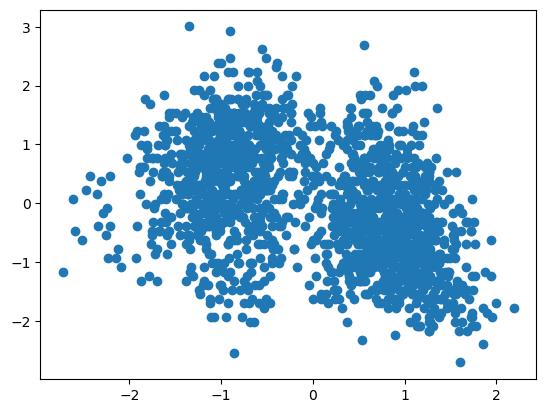

In [60]:
plt.scatter(X_col_scaled2[:,0], X_col_scaled2[:,1])

In [61]:
aggloclust=AgglomerativeClustering(n_clusters=2).fit(X_col_scaled2)
print(aggloclust)
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4)
 

AgglomerativeClustering()


AgglomerativeClustering(n_clusters=4)

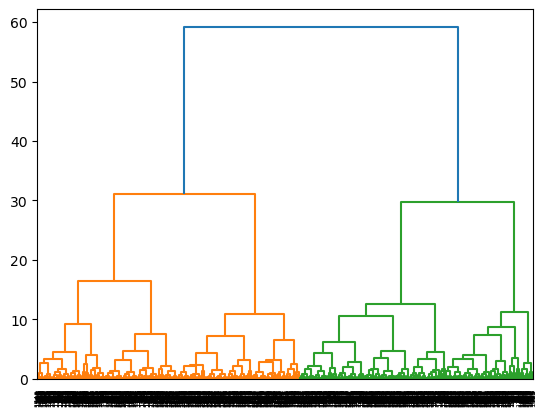

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(X_col_scaled2, 'ward'),
            orientation='top',
            distance_sort='descending',
            )

plt.show()

In [65]:
labels = aggloclust.labels_

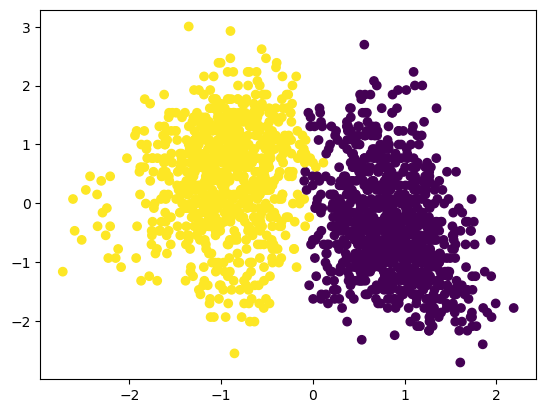

In [47]:
plt.scatter(X_col_scaled2[:,0], X_col_scaled2[:,1], c=labels)
plt.show()